<a href="https://colab.research.google.com/github/burakerdal66/Makine_Ogrenmesi_Projeleri/blob/main/AracFiyatTahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projede kullanılcak veri seti: [kaggle linki](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

Araçlar belirli kriterlere göre fiyatlarında değişme olabiliyor. Markası, Modeli, Yılı,0 fiyatı, yakıt tipi,  yapılan Km vs. etmenler bu değerleri etkileyebilmektedir.

Proje aşamaları:

Veri Setine ulaşmak -> Veri Önişleme -> Verinin test ve eğitim verilerine bölünmesi -> doğrusal ve Lojistik regreyon modelinin kullanılması -> Yeni verilerin değerlendirilmesi

In [ ]:
# Bağımlulıkların içe aktarılması
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Verilerin toplanması ve işlenmesi**

In [ ]:
#Veriyi csv dosyasından pandas dataframe i olarak yüklemek.
araba_verisi=pd.read_csv("/content/drive/MyDrive/datasetler/car data.csv")


In [ ]:
# Veri setindeki ilk 5 satırdaki veriyi çekmek.
araba_verisi.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Satır ve sütun sayılarını kontrol
araba_verisi.shape

(301, 9)

In [ ]:
# Veri setindeki bazı bilgilerie erişmek
araba_verisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Kayıp değerlerin sayısını yazdırmak
araba_verisi.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Kategoriksel verilerin dağılımı
print(araba_verisi.Fuel_Type.value_counts())
print(araba_verisi.Seller_Type.value_counts())
print(araba_verisi.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Kategoriksel verileri numaralandırmak

In [ ]:
# "Fuel_Type" sütununu numaralandırmak
araba_verisi.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# "Seller_Type" sütununu numaralandırmak
araba_verisi.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# "Transmission" sütununu numaralandırmak
araba_verisi.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
araba_verisi.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Verileri ve Hedef etiketi ayırmak

In [ ]:
X= araba_verisi.drop(['Car_Name','Selling_Price'],axis=1)
Y=araba_verisi['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)


In [ ]:
# Modeli eğitimini 2 adet model eğiteceğiz. 1. Lineer Regresyon
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Modelin Değerlendirilmesi
training_data_prediction=lin_reg.predict(X_train)

In [ ]:
#R kareleri Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R kare değeri:",error_score)

R kare değeri: 0.8799451660493711


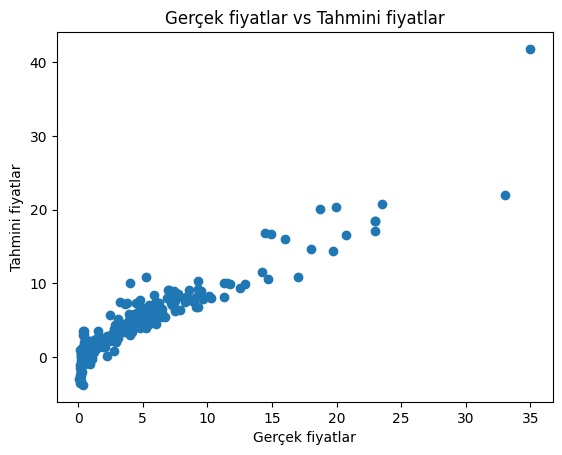

In [ ]:
#Gerçek fiyatlar ile tahmini fiyatları görselleştirme
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Gerçek fiyatlar")
plt.ylabel("Tahmini fiyatlar")
plt.title("Gerçek fiyatlar vs Tahmini fiyatlar")
plt.show()

In [ ]:
# Eğitim verisinin tahminlemesi
test_data_prediction=lin_reg.predict(X_test)

In [ ]:
# R squared ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R kare değeri:",error_score)

R kare değeri: 0.8365766715027051


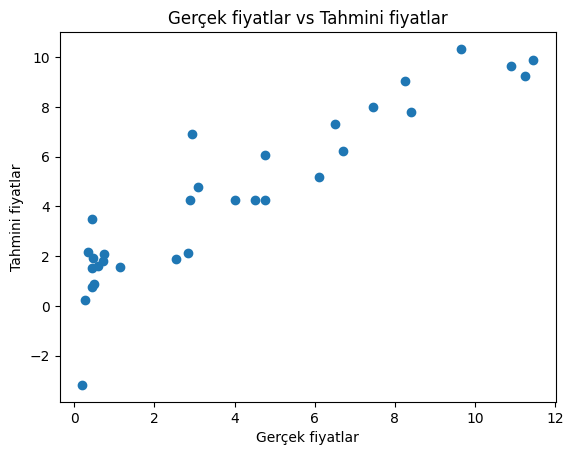

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Gerçek fiyatlar")
plt.ylabel("Tahmini fiyatlar")
plt.title("Gerçek fiyatlar vs Tahmini fiyatlar")
plt.show()

In [ ]:
# 2. lasso regresyon modeli
lass_reg=Lasso()

In [ ]:
lass_reg.fit(X_train,Y_train)

Lasso()

In [ ]:
#Model değerlendirmesi
training_data_prediction=lass_reg.predict(X_train)

In [ ]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R kare değeri:",error_score)

R kare değeri: 0.8427856123435794


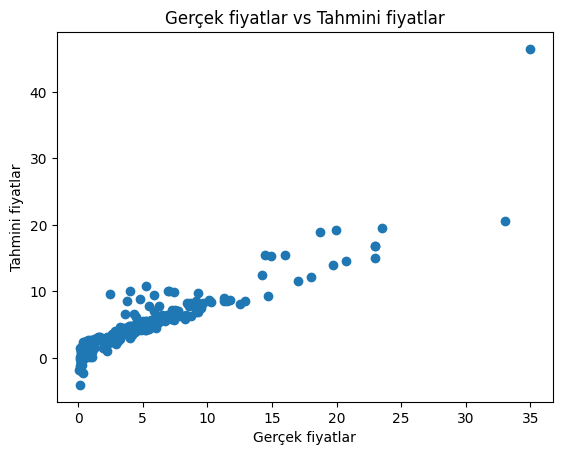

In [ ]:
# Tahmin fiyatları ile gerçek fiyatları karşılaştırma
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Gerçek fiyatlar")
plt.ylabel("Tahmini fiyatlar")
plt.title("Gerçek fiyatlar vs Tahmini fiyatlar")
plt.show()

In [ ]:
# Eğitim verilerinin tahminlemesi
test_data_prediction=lass_reg.predict(X_test)

In [ ]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R kare değeri:",error_score)

R kare değeri: 0.8709167941173195


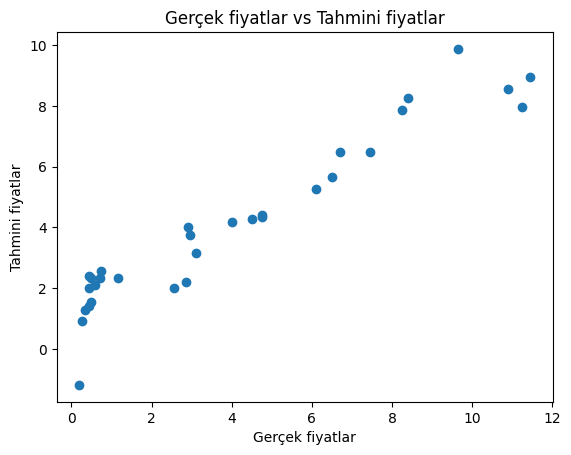

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Gerçek fiyatlar")
plt.ylabel("Tahmini fiyatlar")
plt.title("Gerçek fiyatlar vs Tahmini fiyatlar")
plt.show()